In [ ]:
##Library Importing
import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt


###history tracking bla baalanijsfa



In [ ]:
# Data Importing - Using the Resized Cropped Dataset

NumBatchFiles = 4 # num files to store the training data
PercentSplit = .8 # test-train split ratio

#read in the labels for each image 
labels_df = pd.read_csv(r'Raw_Data/trainLabels_cropped.csv', index_col=0)
#get rid of the dataframes that aren't relevant
del labels_df['Unnamed: 0.1'] # get rid of redundant column

#read in the training set files 
ImageDir = "Raw_Data/resized_train_cropped/resized_train_cropped/*.jpeg"
filenames = [img for img in glob.glob(ImageDir)]
filenames.sort() # sort so each pair of images are together 
filenames = np.array(filenames)

#sort the dataframe by ascii order with the labels so they match the order of the left and right eye images
labels_df = labels_df.sort_values(by=['image'])
labels_array = labels_df.to_numpy()

# break up data by class
Class0Set = np.where(labels_array[:, 1] == 0)[0]
Class1Set = np.where(labels_array[:, 1] == 1)[0]
Class2Set = np.where(labels_array[:, 1] == 2)[0]
Class3Set = np.where(labels_array[:, 1] == 3)[0]
Class4Set = np.where(labels_array[:, 1] == 4)[0]
MasterClassSet = [Class0Set,Class1Set,Class2Set,Class3Set,Class4Set]

#shuffle indices randomly 2x
np.random.shuffle(Class0Set)
np.random.shuffle(Class1Set)
np.random.shuffle(Class2Set)
np.random.shuffle(Class3Set)
np.random.shuffle(Class4Set)

np.random.shuffle(Class0Set)
np.random.shuffle(Class1Set)
np.random.shuffle(Class2Set)
np.random.shuffle(Class3Set)
np.random.shuffle(Class4Set)

In [ ]:
# entire training data is large, so we store the data in 4 separate batch files
# each with class distribution in same proportion as the entire training data set


# this section iterates through each batch
# for each batch iteration, 20% of from each class is added to the Xtrain array
ClassBatchStartIndices = np.zeros((1, 5))

for batch in range(0, 4):
    X_train = []
    Y_train = []

    for ClassNo in range(0, 5):

        # append  PercentSplit / NumBatches % of data of class to the train data
        # get the set indices for the class in question
        Idx = MasterClassSet[ClassNo]
        # get all samples for the class in question
        BatchFileNames = filenames[Idx]
        Ylabels = labels_array[Idx]
        ClassSize = len(Idx)  # the total number of samples in each class 

        # how many samples to pull from the class and where to start pulling from
        ClassBatchSampleSize = np.floor(
            ClassSize * (PercentSplit / NumBatchFiles)).astype(int)

        # get the index from where to start pulling samples
        ClassBatchBegIndex = ClassBatchStartIndices[0, ClassNo].astype(int)

        # read in the the specified sub-section of images for the class in question
        images_data = [plt.imread(
            img) for img in BatchFileNames[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize]]
        #images_data = np.array(images_data[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize])

        # add the specified sub-section of images from the class in question
        X_train = X_train + images_data
        Y_train = Y_train + \
            list(Ylabels[ClassBatchBegIndex:ClassBatchBegIndex +
                         ClassBatchSampleSize])

        # update the class batch start index for the next batch
        ClassBatchStartIndices[0,
                               ClassNo] = ClassBatchBegIndex + ClassBatchSampleSize
        print('Class', ClassNo, 'Class Addition to Xtrain', len(images_data), 'Y Addition to Ytrain', len(list(Ylabels[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize])), '\n')

        print('Batch', batch, 'Class', ClassNo, 'XtrainSize', len(
            X_train), 'Ytrain size', len(Y_train), '\n')

    # save Xtrain as a batch file
    np.save('Xtrain_Batch'+str(batch), X_train)
    np.save('Ytrain_Batch'+str(batch), Y_train)

Class 0 Class Addition to Xtrain 5160 Y Addition to Ytrain 5160 

Batch 0 Class 0 XtrainSize 5160 Ytrain size 5160 

Class 1 Class Addition to Xtrain 487 Y Addition to Ytrain 487 

Batch 0 Class 1 XtrainSize 5647 Ytrain size 5647 

Class 2 Class Addition to Xtrain 1057 Y Addition to Ytrain 1057 

Batch 0 Class 2 XtrainSize 6704 Ytrain size 6704 

Class 3 Class Addition to Xtrain 174 Y Addition to Ytrain 174 

Batch 0 Class 3 XtrainSize 6878 Ytrain size 6878 

Class 4 Class Addition to Xtrain 141 Y Addition to Ytrain 141 

Batch 0 Class 4 XtrainSize 7019 Ytrain size 7019 

Class 0 Class Addition to Xtrain 5160 Y Addition to Ytrain 5160 

Batch 1 Class 0 XtrainSize 5160 Ytrain size 5160 

Class 1 Class Addition to Xtrain 487 Y Addition to Ytrain 487 

Batch 1 Class 1 XtrainSize 5647 Ytrain size 5647 

Class 2 Class Addition to Xtrain 1057 Y Addition to Ytrain 1057 

Batch 1 Class 2 XtrainSize 6704 Ytrain size 6704 

Class 3 Class Addition to Xtrain 174 Y Addition to Ytrain 174 

Batch 1 

['17217_left' 0]


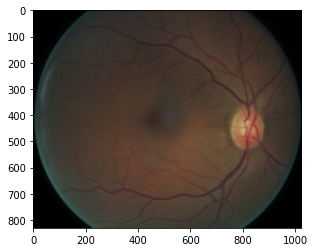

In [ ]:
test = X_train
FileNo = 6
plt.imshow(test[FileNo])
print(Y_train[FileNo])

In [ ]:
#Create Test Data
X_test = []
Y_test = []
for ClassNo in range(0,5):
    
        # append  PercentSplit / NumBatches % of data of class to the train data
        Idx = MasterClassSet[ClassNo] # get the set indices for the class in question
        BatchFileNames = filenames[Idx]  # get all samples for the class in question
        Ylabels = labels_array[Idx]
        ClassSize = len(Idx)  # the total number of samples in each class
    
        # get the index from where to start pulling samples
        ClassBatchBegIndex = ClassBatchStartIndices[0,ClassNo].astype(int) 
        
        # how many samples to pull from the class and where to start pulling from
        #ClassBatchSampleSize = np.floor(
         #   ClassSize * (PercentSplit / NumBatchFiles)).astype(int)
        
        # read in the the specified sub-section of images for the class in question
        images_data = [plt.imread(
            img) for img in BatchFileNames[ClassBatchBegIndex:]]
        
        #add the specified sub-section of images from the class in question
        
        X_test = X_test + images_data
        Y_test = Y_test + \
            list(Ylabels[ClassBatchBegIndex:])
        print('Class', ClassNo, 'Class Addition to Xtrain', len(images_data), 'Y Addition to Ytrain', len(list(Ylabels[ClassBatchBegIndex:])), '\n')


        #print('Batch', batch, 'Class', ClassNo, 'XtrainSize', len(
         #   X_test), 'Ytrain size', len(Y_test), '\n')
    
#save Xtrain as a batch file
np.save('Xtest_Batch', X_test)
np.save('Ytest_Batch', Y_test)

    

Class 0 Class Addition to Xtrain 5162 Y Addition to Ytrain 5162 

Class 1 Class Addition to Xtrain 490 Y Addition to Ytrain 490 

Class 2 Class Addition to Xtrain 1060 Y Addition to Ytrain 1060 

Class 3 Class Addition to Xtrain 176 Y Addition to Ytrain 176 

Class 4 Class Addition to Xtrain 144 Y Addition to Ytrain 144 



['37233_right' 0]
['38253_right' 0]
['13730_left' 1]
['41157_right' 2]


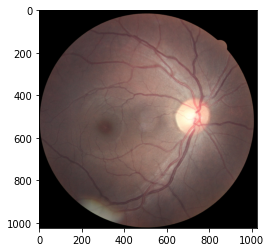

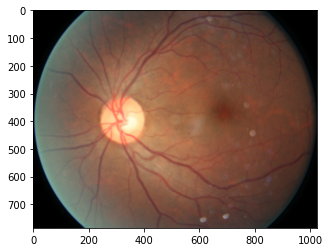

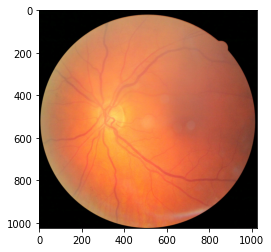

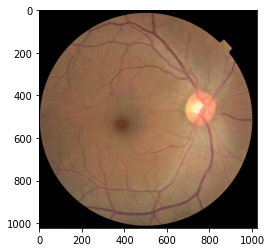

In [ ]:
#checking some random images

SampleNo = [250, 5000, 5500,6000]
Xbtest = np.load('Xtest_Batch.npy', allow_pickle = True)
Ybtest = np.load('Ytest_Batch.npy', allow_pickle=True)


fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[0]])
print(Ybtest[SampleNo[0]])


fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[1]])
print(Ybtest[SampleNo[1]])

fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[2]])
print(Ybtest[SampleNo[2]])


fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[3]])
print(Ybtest[SampleNo[3]])



In [ ]:
print(Xbtest[0].shape)

(954, 1024, 3)
